<a href="https://colab.research.google.com/github/WellingtonLandim/wellingtonlandim.github.io/blob/main/Redu%C3%A7%C3%A3o_dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

In [2]:
# Função para converter imagem para escala de cinza
def f_rgb_cinza(imagem):

    # coloca os tres canais de cor da imagem em cada canal individualizado R, G e B
    r, g, b = imagem[:,:,0], imagem[:,:,1], imagem[:,:,2]

    # Realiza a conversão da camada R, G e B em escalas de cinza utilizando a a formula de multiplicação: Cinza = 0.299*R + 0.587*G + 0.114*B
    cinza = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return cinza.astype(np.uint8)

In [3]:
# Função para convertar a imagem para preto e branco

def f_imagem_pb(imagem, threshold=128):
    # A binarização transforma a imagem em tons de cinza em imagens com apenas dois valores sendo 0 para preto e 255 para branco.
    # O ponto de corte também conhecido como threshold se basea em uma decisão cujo valor precisa ser ajustado de acordo com a imagem.
    # Um valor muito alto de treshold torna a imagem branca, um valor baixo torna a imagem preta.
    imagem_binaria = np.where(imagem >= threshold, 255, 0)
    return imagem_binaria.astype(np.uint8)

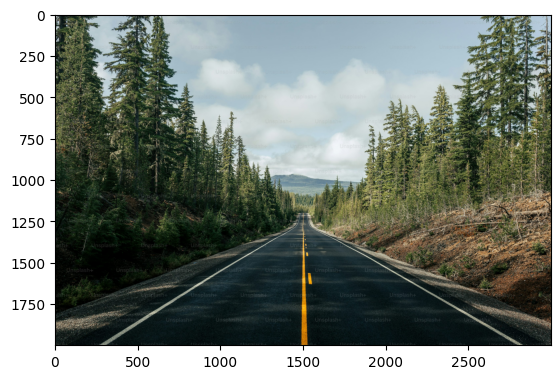

In [4]:
url = "https://raw.githubusercontent.com/WellingtonLandim/wellingtonlandim.github.io/b09fbb71c74af2b1215c5e9fedadfce902af9097/redu%C3%A7%C3%A3o_dimensionalidade/Estrada.jpg"
response = requests.get(url)
response.raise_for_status()
image = Image.open(BytesIO(response.content))
imagem = np.array(image)
plt.imshow(imagem)

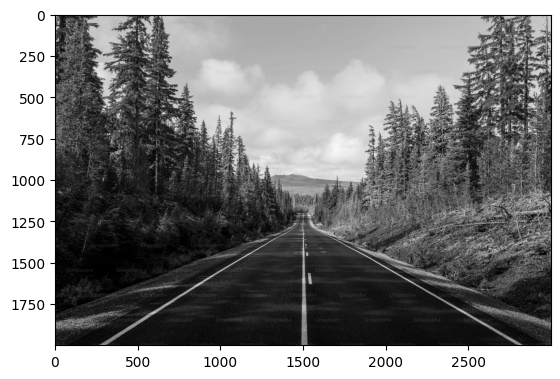

In [5]:

# Converte a imagem para tons de cinza
imagem_tons_cinza = f_rgb_cinza(imagem)

plt.imshow(imagem_tons_cinza, cmap='gray')





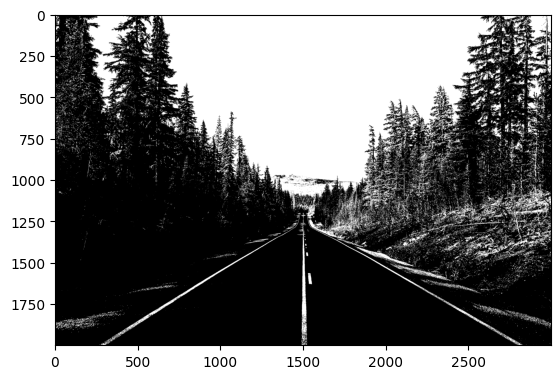

In [6]:
# realiza a conversão da imagem para preto e branco
binary_threshold = 130  # Limiar para binarização
imagem_pb= f_imagem_pb(imagem_tons_cinza, threshold=binary_threshold)

plt.imshow(imagem_pb, cmap='gray')